<a href="https://colab.research.google.com/github/sky309/TEDXTALK-Prediction/blob/main/Sarvesh_Kumar_Yadav_TedXTalk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the Project:
This is a machine learning Capstone project


#Problem Statement:

TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages. 
Founded in 1984 by Richard Salman as a nonprofit organization 
that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates. 
The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.

# Business Goal:


# Structure of this Notebook:


# Data Set Glimpse:
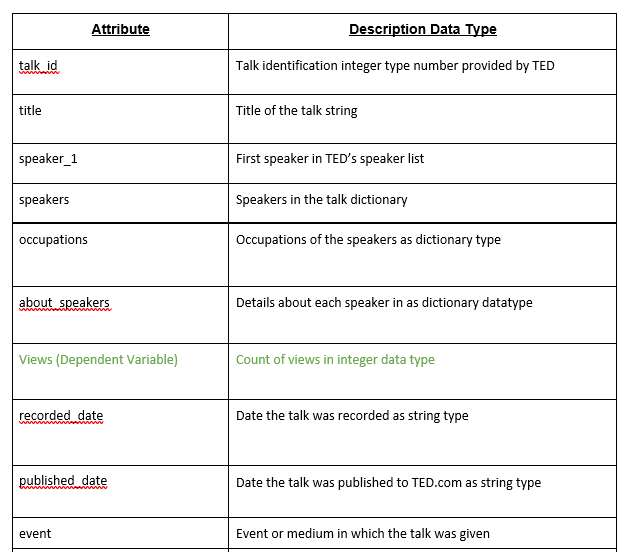

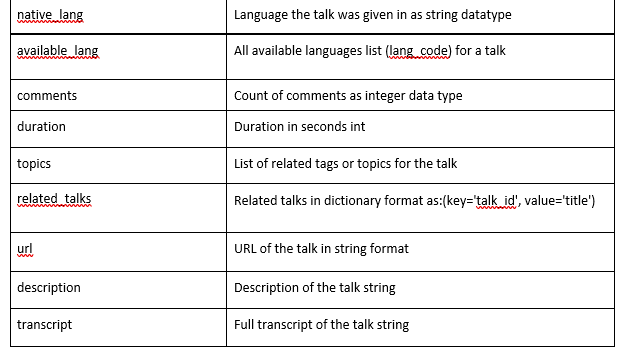

# Importing Libraires and  Packages

1. Numpy: 
2. Pandas
3. Matplotlib
4. Seaborn




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn

from sklearn.model_selection import ShuffleSplit , StratifiedKFold , RepeatedStratifiedKFold ,train_test_split
from sklearn.model_selection import cross_val_score , cross_validate ,cross_val_predict

from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import confusion_matrix as confmat
from sklearn.metrics import precision_recall_curve , classification_report

from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import ast

%matplotlib inline

from sklearn.linear_model import SGDRegressor, ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
import re, string, unicodedata
import nltk
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

In [ ]:
import math
from sklearn.metrics import mean_absolute_error

In [ ]:
from sklearn.metrics import r2_score

#Importing the file

In [ ]:
# reading datasets
file= '/content/drive/MyDrive/AlmaBetter/Modules/Sarvesh Kumar Yadav_Capstone_Project_3_Ted_Talk_Views_Predicition/Copy of data_ted_talks.csv'
data= pd.read_csv(file)

In [ ]:
# For showing all the features:
pd. get_option("display.max_columns")

0

In [ ]:
# Dataset
data.head(2)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."


# EDA : Exploraroty data analysis:

In [ ]:
# Dataframe size
data.shape

(4005, 19)

In [ ]:
# Datasets inforamtion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [ ]:
# data's descriptions
data.describe(include= 'all')

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
count,4005.000000,4005,4005,4001,3483,3502,4.005000e+03,4004,4005,4005,4005,4005,3350.000000,4005.000000,4005,4005,4005,4005,4005
unique,NaN,4005,3274,3306,2049,2977,NaN,1334,2962,459,12,3902,NaN,NaN,3977,4005,4005,4005,4005
top,NaN,"How to co-parent as allies, not adversaries",Alex Gendler,{0: 'Alex Gendler'},{0: ['writer']},{0: 'Alex Rosenthal takes everyday experiences...,NaN,2017-04-24,2017-09-07,TED-Ed,en,['en'],NaN,NaN,"['TED-Ed', 'math']","{372: 'Design and the Elastic Mind', 266: 'Des...",https://www.ted.com/talks/gavin_schmidt_the_em...,"Could the strange orbits of small, distant obj...",I'm going to speak today about the relationshi...
freq,NaN,1,34,34,53,10,NaN,97,27,556,3957,24,NaN,NaN,8,1,1,1,1
mean,12432.538327,NaN,NaN,NaN,NaN,NaN,2.148006e+06,NaN,NaN,NaN,NaN,NaN,161.997015,724.011236,NaN,NaN,NaN,NaN,NaN
std,17447.576262,NaN,NaN,NaN,NaN,NaN,3.451226e+06,NaN,NaN,NaN,NaN,NaN,268.838922,361.775462,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,60.000000,NaN,NaN,NaN,NaN,NaN
25%,1252.000000,NaN,NaN,NaN,NaN,NaN,8.820690e+05,NaN,NaN,NaN,NaN,NaN,38.000000,393.000000,NaN,NaN,NaN,NaN,NaN
50%,2333.000000,NaN,NaN,NaN,NaN,NaN,1.375508e+06,NaN,NaN,NaN,NaN,NaN,89.000000,738.000000,NaN,NaN,NaN,NaN,NaN
75%,23777.000000,NaN,NaN,NaN,NaN,NaN,2.133110e+06,NaN,NaN,NaN,NaN,NaN,188.000000,974.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Dataset values:
data.describe(percentiles=[0.25,0.50,0.75,0.95,0.99]).T

,count,mean,std,min,25%,50%,75%,95%,99%,max
talk_id,4005.0,1.243254e+04,1.744758e+04,1.0,1252.0,2333.0,23777.0,52465.80,60751.60,62794.0
views,4005.0,2.148006e+06,3.451226e+06,0.0,882069.0,1375508.0,2133110.0,6182301.40,16299833.68,65051954.0
comments,3350.0,1.619970e+02,2.688389e+02,0.0,38.0,89.0,188.0,531.65,1038.73,6449.0
duration,4005.0,7.240112e+02,3.617755e+02,60.0,393.0,738.0,974.0,1230.80,1601.12,3922.0


In [ ]:
# Checking for duplicate values:
data[data.duplicated()]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript


In [ ]:
# Checking for Null values
data.isna().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [ ]:
# Making a copy of Dataset:
base_data= data.copy()

In [ ]:
# Looking for columns:
data.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

# Types of data:

In [ ]:
data_categorical= data[['title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers',
       'native_lang', 'available_lang', 'comments', 'topics',
       'related_talks', 'url', 'description', 'transcript']]
data_numerical= data[['talk_id','views', 'duration']] 

data_target_variable= data[['views']]

In [ ]:
# Filling null values of all_speakers by speaker_1
data['all_speakers'].fillna(str({0: [str(data['speaker_1'])]}), inplace=True,axis= 0)

# Formating Datetime Type:

In [ ]:
# Impoting datetime:
from datetime import datetime

In [ ]:
# Setting the datetime format: 
today = datetime.now()
today.strftime('%Y-%m-%d')

'2021-09-13'

# Setting the format:

In [ ]:
data['recorded_date']= pd.to_datetime(data['recorded_date'])

In [ ]:
data['recorded_date']= pd.to_datetime(data['recorded_date'])

In [ ]:
data['published_date']= pd.to_datetime(data['published_date'])

In [ ]:
# Period of day's talk has been published:
last_publishing_date = data['published_date'].max()

In [ ]:
data['time_since_published'] = last_publishing_date - pd.DatetimeIndex(data['published_date'])

# Visualization Part

Visualization for numerical parts

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


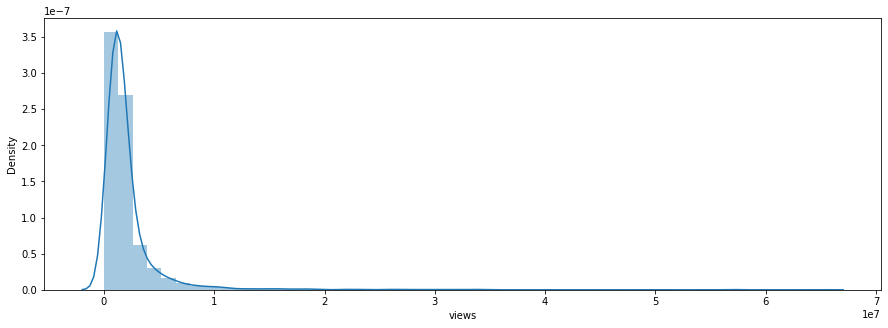

In [ ]:
#visualizing the distplot of views:
plt.figure(figsize=(15,5))
sns.distplot(data['views'])

* **As shown from the graph 'views' feature  is positively skewed.**


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


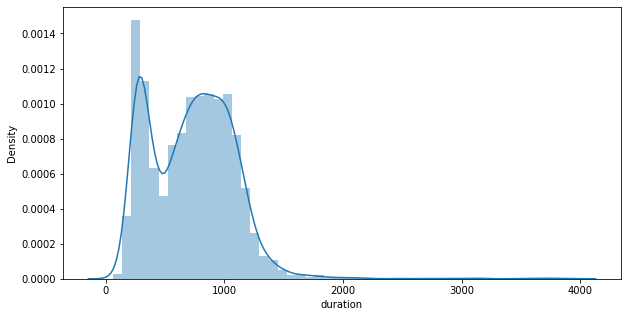

In [ ]:
#visualization of duration
plt.figure(figsize=(10,5))
sns.distplot(data['duration'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


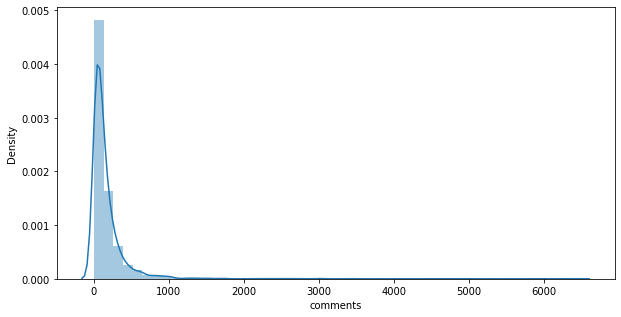

In [ ]:
##visualization of the comments
plt.figure(figsize=(10,5))
sns.distplot(data['comments'])

#All the numerical features are positively skewed.

#**4.Data Preprocessing and Feature Engineering**

Feature engineering is an informal topic, but one that is absolutely known and agreed to be key to success in applied machine learning.

Adding a daily views column for further analysis:

In [ ]:
# Daily views/Talk:
data['daily_views'] = data['views'] / ( data['time_since_published'].apply(lambda x : x.days) + 1 )

New Columns month, year , day, week_day is also added.

In [ ]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_order   = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [ ]:
# new columns for month, year, day is added.
import calendar
data['month'] = pd.DatetimeIndex(data['published_date']).month
data['month'] = data['month'].apply(lambda x: calendar.month_abbr[x])
data['year'] = pd.DatetimeIndex(data['published_date']).year
data['day'] = pd.DatetimeIndex(data['published_date']).day

<b>Bivariate Analysis of different features vs. target variable:</b>

<b> Speaker_1 vs. daily_views:</b>

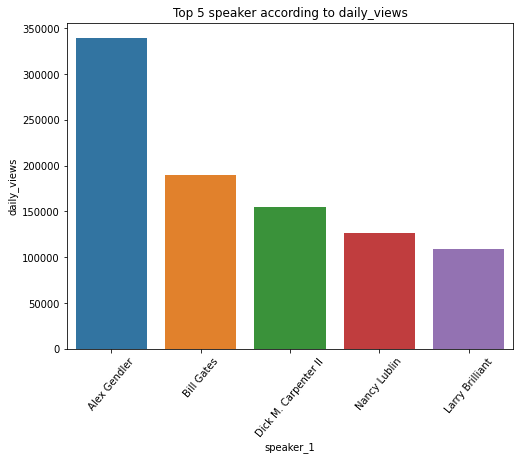

In [ ]:
#top 25 speakers
temp=data.groupby(['speaker_1'],as_index=False)['daily_views'].sum().sort_values('daily_views',ascending=False)[:5]
plt.figure(figsize=(8,6))
ax=sns.barplot(x='speaker_1', y='daily_views',data=temp)
plt.setp(ax.get_xticklabels(), rotation=50);
plt.title('Top 5 speaker according to daily_views')
ax.grid(False)

From the Graph we can depict that:

Alex Gendler is the most popular speaker according to Daily Views.

<b>speaker vs. talks delivered:</b>

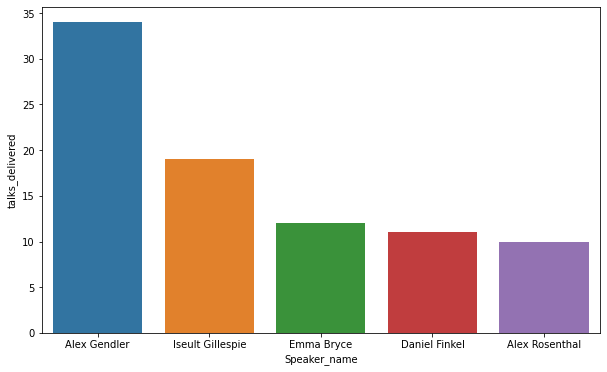

In [ ]:
# Speaker vs. talks delivered:
speaker_count = data['speaker_1'].value_counts().to_frame()
data_speaker_count = pd.DataFrame(speaker_count)
data_speaker_count = data_speaker_count.reset_index()
data_speaker_count.columns = ['Speaker_name', 'talks_delivered']
most_talks = data_speaker_count.nlargest(5, 'talks_delivered')
plt.figure(figsize=(10,6))
sns.barplot(x = 'Speaker_name', y = 'talks_delivered', data = most_talks)

From the graph we can say that :

Alex gendler has delivered the most no. of talks or we can say that he is the most invited speaker at ted.

<b> speaker vs. duration:</b>

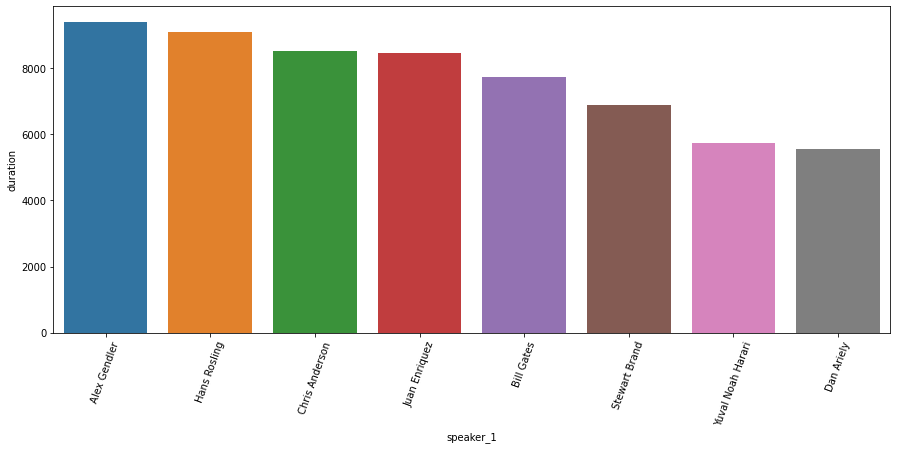

In [ ]:
temp=data.groupby(['speaker_1'],as_index=False)['duration'].sum().sort_values('duration',ascending=False)[:25]
temp=data.groupby(['speaker_1'],as_index=False).agg({'duration':'sum','talk_id':'count'}).sort_values('duration',ascending=False).reset_index()[:8]
temp['talk_id']=temp['duration']/temp['talk_id']
plt.figure(figsize=(15,6))
ax=sns.barplot(x='speaker_1',y='duration',data=temp)
labels=ax.get_xticklabels()
plt.setp(labels, rotation=70);

From the graph we can say that :

Alex gendler has delivered the longest duration talk

# Applying target encoding on speaker1

In [ ]:
speaker=data.groupby('speaker_1').agg({'daily_views' : 'mean'}).sort_values(['daily_views'],ascending=False)
speaker=speaker.to_dict()
speaker=speaker.values()
speaker=  list(speaker)[0]
data['speaker_1_avg_views']=data['speaker_1'].map(speaker)

<b> speaker1 avg. views.</b>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


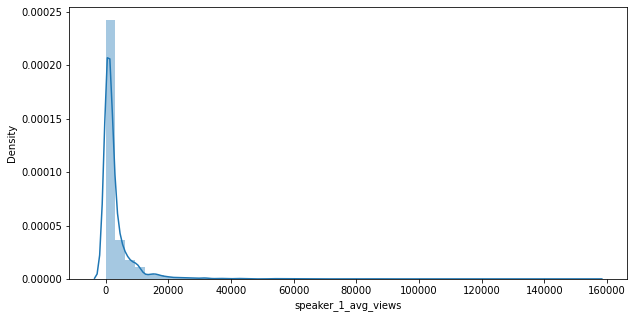

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(data['speaker_1_avg_views'])


#**Event**

As event is also a categorical feature, we have done target encoding on it

In [ ]:
event=data.groupby('event').agg({'daily_views' : 'mean'}).sort_values(['daily_views'],ascending=False)
event=event.to_dict()
event=event.values()
event=  list(event)[0]
data['event_wise_avg_views']=data['event'].map(event)

Plot of event_wise_avg_views

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


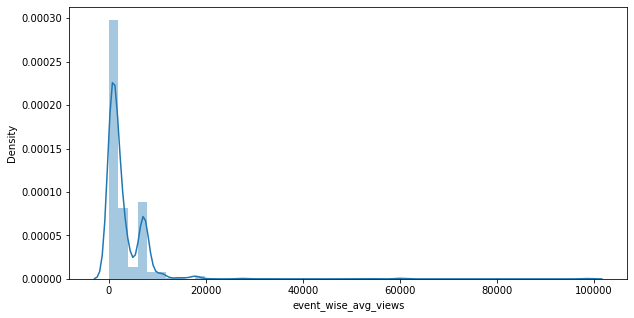

In [ ]:
# Event wise avg. views:
plt.figure(figsize=(10,5))
sns.distplot(data['event_wise_avg_views'])

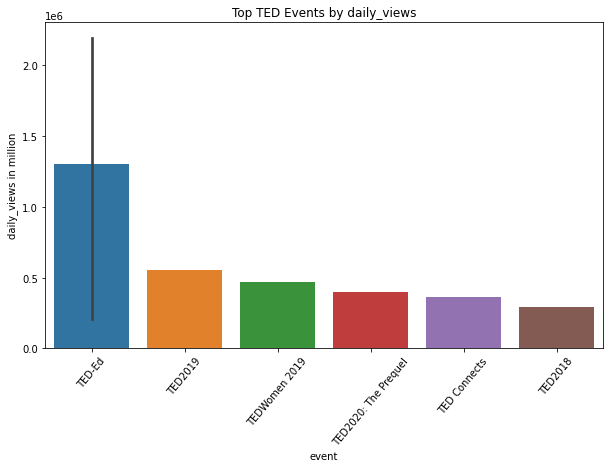

In [ ]:
temp=data.groupby(['event','year'],as_index=False).agg({'daily_views':'sum','talk_id':'count'}).sort_values('daily_views',ascending=False).reset_index()[:8]
temp['talk_id']=temp['daily_views']/temp['talk_id']
plt.figure(figsize=(10,6))
ax=sns.barplot(x='event',y='daily_views',data=temp)
labels=ax.get_xticklabels()
plt.title('Top TED Events by daily_views')
plt.ylabel('daily_views in million')
plt.setp(labels, rotation=50);

<b>From the graph we can depict that the most frequent event of TED is TED-ED</b>

# Density plot of available language columns:

In [ ]:
data['number_of_lang'] = data['available_lang'].apply(lambda x: len(x))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


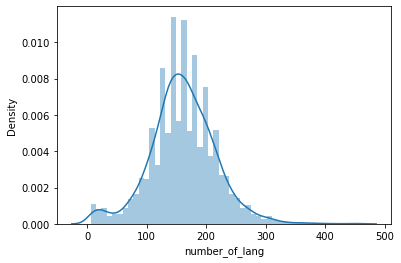

In [ ]:
sns.distplot(data['number_of_lang'])

# Density plot of num of topics:

In [ ]:
data['topics'] = data.apply(lambda x: eval(x['topics']), axis=1)

# Density plot for topic_wise_views:

In [ ]:
#Checking for unique topic
unique_topics=[]
for i in range(0,len(data)):
  temp=data['topics'][i]
  for i in temp:
    if(i not in unique_topics):
      unique_topics.append(i)
      
len(unique_topics)

457

In [ ]:
#fetching the avg views w.r.t each topic in another dict unique_topics_avg_view_dict
unique_topics_avg_view_dict={}
for topic in unique_topics:
  temp=0
  count=0
  for i in range(0,len(data)):
    temp2=data['topics'][i]
    if(topic in temp2):
      temp+=data['daily_views'][i]
      count+=1
  unique_topics_avg_view_dict[topic]=temp//count

In [ ]:
#storing the avg views w.r.t topic for each talk
topics_wise_avg_views=[]
for i in range(0,len(data)):
  temp=0
  temp_topic=data['topics'][i]
  for ele in temp_topic:
    temp+=unique_topics_avg_view_dict[ele]
  
  topics_wise_avg_views.append(temp//len(temp_topic))

se = pd.Series(topics_wise_avg_views)
data['topics_wise_avg_views'] = se.values

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


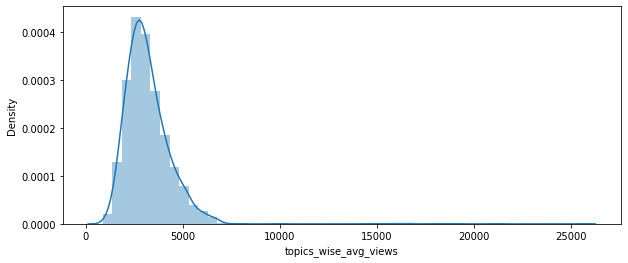

In [ ]:
# Graph:
plt.figure(figsize=(10,4))
sns.distplot(data['topics_wise_avg_views'])

# related_talks column.

In [ ]:
#applying eval function related talk column:
import ast
data['related_talks'] = data['related_talks'].apply(lambda x: ast.literal_eval(x))

# <b>Related Talk</b>
Related talk column contains a dictionary containing information about related videos with talk_id as key and video name as it's value.** ** taking mean of all realated talk videos views:

In [ ]:
#defining a new feature called related_views
data['related_views'] = 0
#iterating through the each row and extracting the value of related_talks
for index, row in data.iterrows():
    id_list=list(row['related_talks'].keys())
    temp=0
    for i in range(len(data)):
      if (data.loc[i,'talk_id']) in id_list:
        temp+=data.loc[i,'daily_views']

    data.loc[index,'related_views']=temp//6

<b>Density plot of realted_views:</b>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


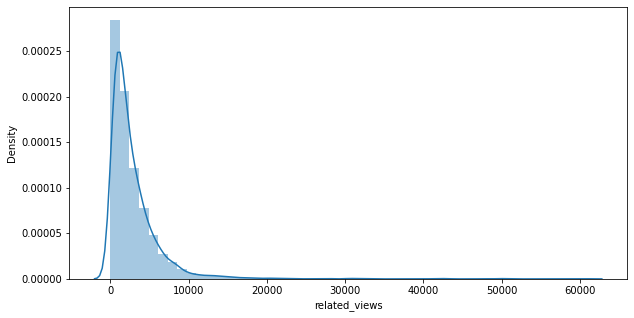

In [ ]:
#Graph of related_views column
plt.figure(figsize=(10,5))
sns.distplot(data['related_views'])

# <b> 5. Data Cleaning.</b>

 Outlier Treatment on numerical columns.

Outliers are present in few columns which needs to be treated. We are replacing the outliers with the mean values.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


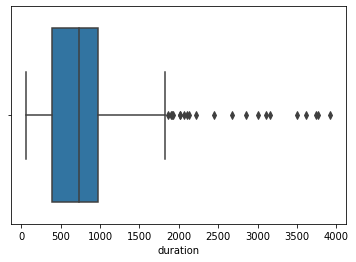

In [ ]:
# Aplying Outlier treatment on duration and number of Languages:
sns.boxplot(data['duration'], data= data)

In [ ]:
data_duration_iqr=  data['duration'].quantile(0.75)-data['duration'].quantile(0.25)
data['duration']= data['duration'].mask(data['duration']>(data['duration'].quantile(0.75)+1.5*data_duration_iqr), data['duration'].mean())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


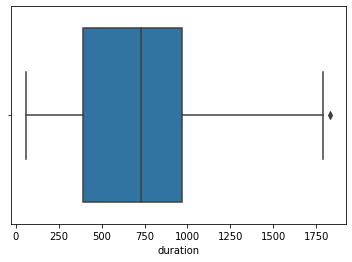

In [ ]:
# After Treatment of outliers:
sns.boxplot(data['duration'], data= data)

<b> Outlier treatment for Number of languages available:</b>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


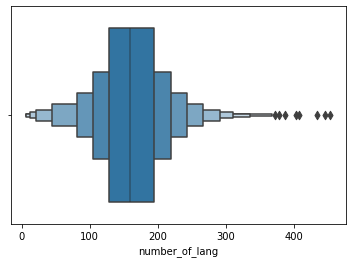

In [ ]:
sns.boxenplot(data['number_of_lang'], data= data)

In [ ]:
number_of_lang_iqr= (data['number_of_lang'].quantile(0.75))-(data['number_of_lang'].quantile(0.25))
data['number_of_lang']= data['number_of_lang'].mask(data['number_of_lang']>(data['number_of_lang'].quantile(0.75)+1.5*number_of_lang_iqr), data['number_of_lang'].mean())

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


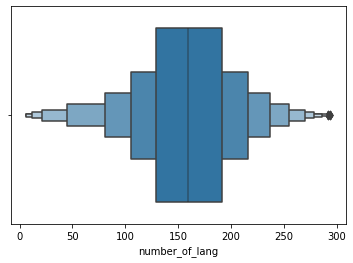

In [ ]:
sns.boxenplot(data['number_of_lang'], data= data)

* **Now, we don't have any outliers.**

#<b> Correlation Plot:</b>

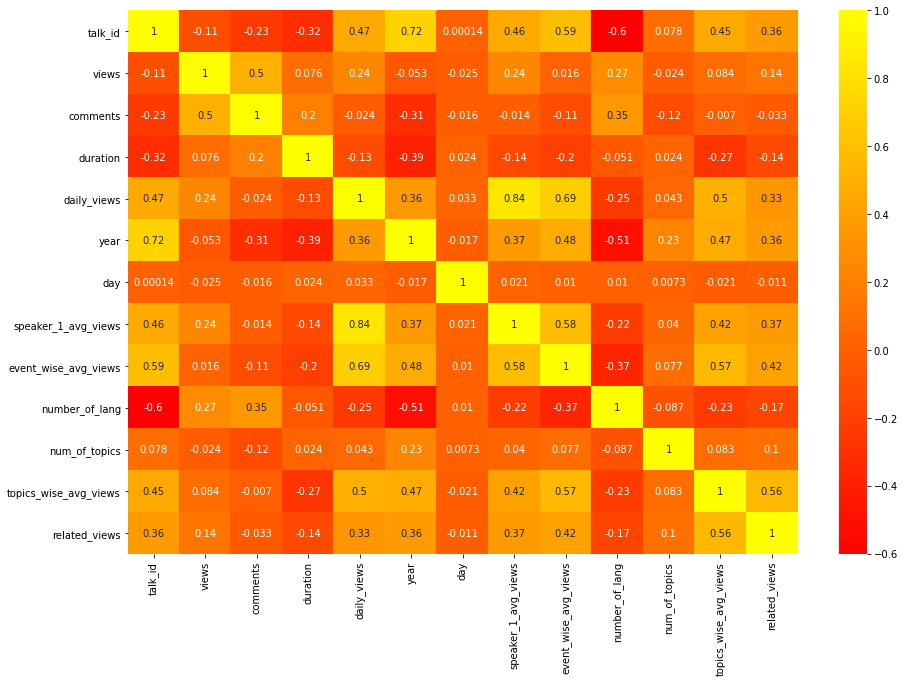

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot= True, cmap= "autumn",ax=ax)
# plt.figure(figsize=(10,8))

# Datset Columns:

In [ ]:
data.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript',
       'time_since_published', 'daily_views', 'month', 'year', 'day',
       'speaker_1_avg_views', 'event_wise_avg_views', 'number_of_lang',
       'num_of_topics', 'topics_wise_avg_views', 'related_views'],
      dtype='object')

# Nlp dataset:

In [ ]:
nlp_dataset= data.copy()

# Removing Irrelevant columns:

In [ ]:
unwanted_features=['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'topics',
       'related_talks', 'url', 'description', 'transcript',
     'topics_wise_avg_views', 'related_views']

In [ ]:
df=data.copy()

In [ ]:
#dropping unimportant columns from the datasets.
df.drop(columns=unwanted_features,inplace=True)

In [ ]:
# Defining the dependent and independent variables.

#separating the dependent and independent variables
y=df['daily_views']
X=df.drop(columns='daily_views')

In [ ]:
#one hot encoding on categorical features
X=pd.get_dummies(X)
X.shape

(4005, 21)

In [ ]:
X.head(2)

,comments,duration,time_since_published,year,day,speaker_1_avg_views,event_wise_avg_views,number_of_lang,num_of_topics,month_Apr,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,month_Oct,month_Sep
0,272.0,977.0,5056 days,2006,27,699.725014,782.72889,270.000000,9,0,0,0,0,0,0,1,0,0,0,0,0
1,628.0,1190.0,5056 days,2006,27,1098.925286,782.72889,160.720599,11,0,0,0,0,0,0,1,0,0,0,0,0


<b>5.2 treatment of  nan values of numerical columns using KNNImpute</b>

In [ ]:
#checking for null values
X[['duration','comments']].isna().sum()

duration      0
comments    655
dtype: int64

In [ ]:
#Taking features for using in KNNImputer
outlier_data=['duration','comments','speaker_1_avg_views','event_wise_avg_views']

In [ ]:
# Before applying KNNImputer, we have to scale features so avoid bias.
scaler = StandardScaler()
#Import libraries
from sklearn.impute import KNNImputer
# define imputer
imputer = KNNImputer()
#fitting the model
imputer.fit(scaler.fit_transform(X[outlier_data]))
# transform the dataset
X[outlier_data] = imputer.transform(scaler.fit_transform(X[outlier_data]))
#again applying inverse_transform on the data
X[outlier_data] = scaler.inverse_transform(X[outlier_data])

In [ ]:
# Checking Nan values:
X[['duration','comments']].isna().sum()

duration    0
comments    0
dtype: int64

# </b>Modelling Part:</b>

# </b>XGboost Regressor:

In [ ]:
#Importing XGBoost
import xgboost as xgb
xgb_model= xgb.XGBRegressor(objective="reg:squarederror")

In [ ]:
X= data[['duration',
       'speaker_1_avg_views', 'event_wise_avg_views',
       'number_of_lang', 'num_of_topics', 'topics_wise_avg_views', 'year', 'day']]
X= scaler.fit_transform(X)
y= scaler.fit_transform(data['daily_views'].values.reshape(-1,1))


<b>splitting train test dataset:</b>

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y,  test_size= 0.20, random_state= 5)

<b>Fitting the model</b>

In [ ]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_r2_train=xgb_model.score(X_train, y_train)
xgb_r2_train

0.9491477883863317

In [ ]:
xgb_r2_test= xgb_model.score(X_test, y_test)
xgb_r2_test

0.8120309810306731

In [ ]:
xgb_y_train_pred= xgb_model.predict(X_train)
xgb_y_test_pred= xgb_model.predict(X_test)

In [ ]:
mean_absolute_error(y_train,xgb_y_train_pred)

0.08549261935512241

In [ ]:
mean_absolute_error(y_test, xgb_y_test_pred)

0.11588391495715948

In [ ]:
xgb_rmse_train = math.sqrt(mean_squared_error(y_train,xgb_y_train_pred))
xgb_rmse_train

0.23200480607579269

In [ ]:
xgb_rmse_test = math.sqrt(mean_squared_error(y_test,xgb_y_test_pred))
xgb_rmse_test

0.37916236829200006

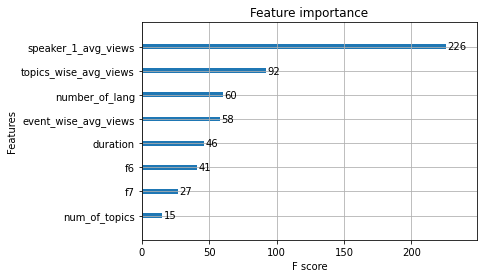

In [ ]:
# model = joblib.load("your_saved.model")
xgb_model.get_booster().feature_names = ['duration', 'speaker_1_avg_views', 'event_wise_avg_views','number_of_lang', 'num_of_topics', 'topics_wise_avg_views']
xgb.plot_importance(xgb_model.get_booster())

# </b> Cat boost Regressor:</b>

In [ ]:
# Installing cat boost:
!pip install catboost

     |████████████████████████████████| 67.4 MB 27 kB/s 


In [ ]:
from catboost import CatBoostRegressor

In [ ]:
model = CatBoostRegressor(iterations=50,
                          learning_rate=0.6,
                          depth=10)
model.fit(X_train, y_train)

0:	learn: 0.7326534	total: 66.2ms	remaining: 3.25s
1:	learn: 0.5455637	total: 81.3ms	remaining: 1.95s
2:	learn: 0.4545648	total: 95.9ms	remaining: 1.5s
3:	learn: 0.3936618	total: 110ms	remaining: 1.27s
4:	learn: 0.3572513	total: 126ms	remaining: 1.13s
5:	learn: 0.3353780	total: 141ms	remaining: 1.03s
6:	learn: 0.3171917	total: 155ms	remaining: 953ms
7:	learn: 0.2807313	total: 170ms	remaining: 892ms
8:	learn: 0.2646069	total: 185ms	remaining: 843ms
9:	learn: 0.2506043	total: 200ms	remaining: 801ms
10:	learn: 0.2416100	total: 216ms	remaining: 764ms
11:	learn: 0.2332904	total: 231ms	remaining: 731ms
12:	learn: 0.2228199	total: 246ms	remaining: 700ms
13:	learn: 0.2114558	total: 261ms	remaining: 672ms
14:	learn: 0.2014849	total: 281ms	remaining: 656ms
15:	learn: 0.1851814	total: 296ms	remaining: 628ms
16:	learn: 0.1847796	total: 297ms	remaining: 577ms
17:	learn: 0.1788435	total: 312ms	remaining: 554ms
18:	learn: 0.1671459	total: 327ms	remaining: 533ms
19:	learn: 0.1633319	total: 341ms	remai

In [ ]:
cat_y_train_pred= model.predict(X_train)
cat_y_test_pred= model.predict(X_test)

In [ ]:
cat_boost_r2_test = r2_score(y_test,cat_y_test_pred)
cat_boost_r2_test

0.8189140248690157

In [ ]:
cat_boost_r2_train=r2_score(y_train, cat_y_train_pred)
cat_boost_r2_train

0.9965768354591866

In [ ]:
mean_absolute_error(y_train,cat_y_train_pred)

0.039386241533520015

In [ ]:
mean_absolute_error(y_test, cat_y_test_pred)

0.13374354988423143

In [ ]:
cat_rmse_train = math.sqrt(mean_squared_error(y_train,cat_y_train_pred))
cat_rmse_train

0.06019438008348462

In [ ]:
cat_rmse_test = math.sqrt(mean_squared_error(y_test,cat_y_test_pred))
cat_rmse_test

0.37215554814784363

 # <b>Applying NLP :</b>

In [ ]:
from nltk.corpus import stopwords
import string
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer("english")

In [ ]:
!pip install contractions
import contractions

     |████████████████████████████████| 321 kB 4.8 MB/s 
     |████████████████████████████████| 284 kB 51.9 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85451 sha256=60bd9af92277574c03066649f788f9c3143b5afd09caa473ebaa87b0850afb72
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
def remove_punctuation(text):
  # creating an empty list
  expanded_words = []    
  for word in text.split():
    # using contractions.fix to expand the shotened words
    expanded_words.append(contractions.fix(word))   
      
  expanded_text = ' '.join(expanded_words)
  no_punct=expanded_text.translate(str.maketrans('', '', string.punctuation))

  return no_punct

In [ ]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
wnet= WordNetLemmatizer()
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
def lemmatize(text):    
    '''a function which stems each word in the given text'''
    text = [wnet.lemmatize(word) for word in text.split()]
    return " ".join(text)

In [ ]:
data['title'] = data['title'].apply(remove_punctuation)
data['title'] = data['title'].apply(stopwords)
data['title'] = data['title'].apply(lemmatize)
data['title'].head(2)

0    averting climate crisis
1       best stats ever seen
Name: title, dtype: object

In [ ]:
# fit the vectorizer using the text data
X=tfid_vectorizer.fit_transform(data['title']).toarray()
y= scaler.fit_transform(data['daily_views'].values.reshape(-1,1))
# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [ ]:
X

<4005x4528 sparse matrix of type '<class 'numpy.float64'>'
	with 15372 stored elements in Compressed Sparse Row format>

In [ ]:
tfid_vectorizer.vocabulary_

{'averting': 315,
 'climate': 732,
 'crisis': 924,
 'best': 400,
 'stats': 3803,
 'ever': 1352,
 'seen': 3531,
 'simplicity': 3632,
 'sell': 3546,
 'greening': 1742,
 'ghetto': 1674,
 'school': 3493,
 'kill': 2187,
 'creativity': 914,
 'behind': 391,
 'design': 1062,
 'seattle': 3518,
 'library': 2286,
 'letting': 2277,
 'go': 1697,
 'god': 1699,
 'let': 2273,
 'teach': 3967,
 'religion': 3300,
 'life': 2291,
 'purpose': 3181,
 'wish': 4452,
 'global': 1688,
 'day': 1001,
 'film': 1495,
 'help': 1845,
 'stop': 3821,
 'pandemic': 2862,
 'call': 570,
 'opensource': 2786,
 'architecture': 245,
 'one': 2779,
 'laptop': 2228,
 'per': 2921,
 'child': 682,
 'radical': 3214,
 'promise': 3144,
 'multitouch': 2617,
 'interface': 2072,
 'improvising': 1997,
 'piano': 2966,
 'aged': 128,
 '14': 16,
 '11yearolds': 10,
 'magical': 2375,
 'violin': 4325,
 'simple': 3631,
 'save': 3478,
 'organic': 2807,
 'inspired': 2058,
 'nature': 2652,
 'birth': 433,
 'wikipedia': 4429,
 'learning': 2256,
 'revolu

In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X, y,  test_size= 0.20, random_state= 5)

In [ ]:
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:

y_train_pred= xgb_model.predict(X_train)

In [ ]:
y_test_pred= xgb_model.predict(X_test)

In [ ]:
xgb_model.score(X_train, y_train)

0.6204267398392183

In [ ]:
xgb_model.score(X_test, y_test)

-0.11917973135864446

In [ ]:
r2_score(y_train, y_train_pred)

0.6204267398392183

In [ ]:
r2_score(y_test, y_test_pred)

-0.11917973135864446

# <b> Final Model Selection:</b>

As, r2 score for XG Boost testing dataset is better than all other models. I will go with XG Boost Model.
NLP is not giving good efficiency I am not considering NLP part. 


# <b> 10. Conclusion </b>

Although! We did not get very good efficiency. But testing dataset r2_score for XGBoost is highr than all other models. We can go with XG Booost.
Here is a lot of scope for further work.
Nlp part did not provided good insights.
Many good feature engineering techniques can be applied. 
Deep learning technique can also be applied.

# <b> Future Work:</b>

Many good feature engineering techniques can be applied. Deep learning technique can also be applied.
Lots of scope is for further work.